In [506]:
import pandas as pd
import numpy as np

# Data Preprocessing

In [507]:
file_path_train = 'train.csv'
file_path_test = 'test.csv'
poverty_train = pd.read_csv(file_path_train)
poverty_test = pd.read_csv(file_path_test)
poverty_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [508]:
# Check for any missing values in each column
# Select columns with any missing values
poverty_train_missing = poverty_train.loc[:, poverty_train.isna().any()]

# Calculate the percentage of features with missing data
percentage_missing = (poverty_train_missing.shape[1] / poverty_train.shape[1]) * 100

print("Missing data found in {:.2f}% of features in train set".format(percentage_missing))


Missing data found in 3.50% of features in train set


In [509]:
# Check for any missing values in each column
# Select columns with any missing values
poverty_test_missing = poverty_test.loc[:, poverty_test.isna().any()]

# Calculate the percentage of features with missing data
percentage_missing = (poverty_test_missing.shape[1] / poverty_test.shape[1]) * 100

print("Missing data found in {:.2f}% of features of test set".format(percentage_missing))


Missing data found in 3.52% of features of test set


In [510]:
columns_with_nan = poverty_train.columns[poverty_train.isna().any()].tolist()

# Print columns with NaN values
for col in columns_with_nan:
    print(f"Column '{col}' contains NaN values.")

Column 'v2a1' contains NaN values.
Column 'v18q1' contains NaN values.
Column 'rez_esc' contains NaN values.
Column 'meaneduc' contains NaN values.
Column 'SQBmeaned' contains NaN values.


In [511]:
# NaN values in number of tables household owns is equal to 0
poverty_train['v18q1'].fillna(0, inplace=True)

# Unkown Education wil be labelled as the average values given previously
poverty_train['rez_esc'].fillna(poverty_train['rez_esc'].mean(skipna=True), inplace=True)
poverty_train['meaneduc'].fillna(poverty_train['meaneduc'].mean(skipna=True), inplace=True)
poverty_train['SQBmeaned'].fillna(poverty_train['SQBmeaned'].mean(skipna=True), inplace=True)

# NaN values in number of tables household owns is equal to 0
poverty_test['v18q1'].fillna(0, inplace=True)

# Unkown Education wil be labelled as the average values given previously
poverty_test['rez_esc'].fillna(poverty_test['rez_esc'].mean(skipna=True), inplace=True)
poverty_test['meaneduc'].fillna(poverty_test['meaneduc'].mean(skipna=True), inplace=True)
poverty_test['SQBmeaned'].fillna(poverty_test['SQBmeaned'].mean(skipna=True), inplace=True)

In [512]:
# Dropping NaN value rows in rent. This row is irrelevant.
poverty_train.dropna(subset=['v2a1'], inplace=True)
poverty_test.dropna(subset=['v2a1'], inplace=True)

In [513]:
# poverty_train = poverty_train.dropna()
# poverty_test = poverty_test.dropna()

In [514]:
poverty_train['education'] = 0
poverty_test['education'] = 0

# instlevel1, =1 
# instlevel2, =1
# instlevel3, =1
# instlevel4, =1
# instlevel5, =1
# instlevel6, =1
# instlevel7, =1
# instlevel8, =1
# instlevel9, =1
weights = {
    'instlevel1': 0, # no level of education
    'instlevel2': 1, # incomplete primary
    'instlevel3': 2, # complete primary
    'instlevel4': 3, # incomplete academic secondary level
    'instlevel5': 4, # complete academic secondary level
    'instlevel6': 5, # incomplete technical secondary level
    'instlevel7': 6, # complete technical secondary level
    'instlevel8': 7, # undergraduate and higher education
    'instlevel9': 8 # postgraduate higher education
}
for level, weight in weights.items():
    poverty_train['education'] += poverty_train[level] * weight
    poverty_test['education'] += poverty_test[level] * weight

poverty_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,education
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,3
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,7
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,289,16,121,4,1.777778,1.0,121.0,289,4,3
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,1444,16,121,4,1.777778,1.0,121.0,1444,4,4


In [515]:
"""
estadocivil1: 1 - Less than 10 years old
estadocivil2: 2 - Freedom or cohabitation
estadocivil3: 3 - Married
estadocivil4:4 - Divorce
estadocivil5:5 - Separation
estadocivil6:6 - Widowed
estadocivil7:7 - Single
"""
def determine_marital_status(row):
    for i in range(1, 8): 
        if row[f'estadocivil{i}'] == 1:
            return i

poverty_train['marital_status'] = poverty_train.apply(determine_marital_status, axis=1)
poverty_test['marital_status'] = poverty_test.apply(determine_marital_status, axis=1)

poverty_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,education,marital_status
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1,100,0,1.000000,0.0,100.0,1849,4,3,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,1,144,0,1.000000,64.0,144.0,4489,4,7,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,16,121,4,1.777778,1.0,121.0,289,4,3,7
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,16,121,4,1.777778,1.0,121.0,1369,4,4,2
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,16,121,4,1.777778,1.0,121.0,1444,4,4,2


In [516]:
"""
parentesco1, 1 if household head
parentesco2, 2 if spouse/partner
parentesco3, 3 if son/doughter
parentesco4, 4 if stepson/doughter
parentesco5, 5 if son/doughter in law
parentesco6, 6 if grandson/doughter
parentesco7, 7 if mother/father
parentesco8, 8 if father/mother in law
parentesco9, 9 if brother/sister
parentesco10, 10 if brother/sister in law
parentesco11, 11 if other family member
parentesco12, 12 if other non family member
"""
def determine_family_role(row):
    for i in range(1, 13):  
        if row[f'parentesco{i}'] == 1:
            return i 

poverty_train['family_role'] = poverty_train.apply(determine_family_role, axis=1)
poverty_test['family_role'] = poverty_test.apply(determine_family_role, axis=1)

"""
poverty[['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 
    'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 
    'parentesco11', 'parentesco12', 'family_role']].head()
"""

poverty_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,education,marital_status,family_role
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,0,1.000000,0.0,100.0,1849,4,3,4,1
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,0,1.000000,64.0,144.0,4489,4,7,4,1
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,121,4,1.777778,1.0,121.0,289,4,3,7,3
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,4,1.777778,1.0,121.0,1369,4,4,2,2
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,4,1.777778,1.0,121.0,1444,4,4,2,1


In [517]:
def classify_wall_material(row):
    materials = {
        'paredblolad': 1,  # Block or brick
        'paredzocalo': 2,  # Socket (wood, zinc or asbestos)
        'paredpreb': 3,  # Prefabricated or cement
        'pareddes': 4,  # Waste material
        'paredmad': 5,  # Wood
        'paredzinc': 6,  # Zinc
        'paredfibras': 7,  # Natural fibers
        'paredother': 8   # Other
    }
    for material, numeric_label in materials.items():
        if row[material] == 1:
            return numeric_label
    return 0  

def classify_floor_material(row):
    materials = {
        'pisomoscer': 1,  # Mosaic, ceramic, terrazzo
        'pisocemento': 2,  # Cement
        'pisoother': 3,    # Other
        'pisonatur': 4,    # Natural material
        'pisonotiene': 5,  # No floor
        'pisomadera': 6    # Wood
    }
    for material, numeric_label in materials.items():
        if row[material] == 1:
            return numeric_label
    return 0

def classify_roof_material(row):
    materials = {
        'techozinc': 1,        # Metal foil or zinc
        'techoentrepiso': 2,   # Fiber cement, mezzanine
        'techocane': 3,        # Natural fibers
        'techootro': 4         # Other
    }
    for material, numeric_label in materials.items():
        if row[material] == 1:
            return numeric_label
    return 0 

poverty_train['wall_material'] = poverty_train.apply(classify_wall_material, axis=1)
poverty_train['floor_material'] = poverty_train.apply(classify_floor_material, axis=1)
poverty_train['roof_material'] = poverty_train.apply(classify_roof_material, axis=1)

poverty_test['wall_material'] = poverty_test.apply(classify_wall_material, axis=1)
poverty_test['floor_material'] = poverty_test.apply(classify_floor_material, axis=1)
poverty_test['roof_material'] = poverty_test.apply(classify_roof_material, axis=1)

In [518]:
def classify_water_provision(row):
    conditions = {
        'abastaguadentro': 1,  # Inside the dwelling
        'abastaguafuera': 2,  # Outside the dwelling
        'abastaguano': 3      # No water provision
    }
    for condition, numeric_label in conditions.items():
        if row[condition] == 1:
            return numeric_label
    return 0  # Unknown

poverty_train['water_provision'] = poverty_train.apply(classify_water_provision, axis=1)
poverty_test['water_provision'] = poverty_test.apply(classify_water_provision, axis=1)

In [519]:
def classify_toilet(row):
    toilet_types = {
        'sanitario1': 1,  # No toilet in the dwelling
        'sanitario2': 2,  # Toilet connected to sewer or cesspool
        'sanitario3': 3,  # Toilet connected to septic tank
        'sanitario5': 4,  # Toilet connected to black hole or latrine
        'sanitario6': 5   # Toilet connected to other system
    }
    for key, numeric_label in toilet_types.items():
        if row[key] == 1:
            return numeric_label
    return 0  # Unknown
        
def classify_cooking_energy(row):
    cooking_energies = {
        'energcocinar1': 1,  # No main source of energy used for cooking (no kitchen)
        'energcocinar2': 2,  # Main source of energy used for cooking is electricity
        'energcocinar3': 3,  # Main source of energy used for cooking is gas
        'energcocinar4': 4   # Main source of energy used for cooking is wood charcoal
    }
    for key, numeric_label in cooking_energies.items():
        if row[key] == 1:
            return numeric_label
    return 0  # Unknown

def classify_waste_disposal(row):
    waste_disposals = {
        'elimbasu1': 1,  # Rubbish disposal mainly by tanker truck
        'elimbasu2': 2,  # Rubbish disposal mainly by botan hollow or buried
        'elimbasu3': 3,  # Rubbish disposal mainly by burning
        'elimbasu4': 4,  # Rubbish disposal mainly by throwing in an unoccupied space
        'elimbasu5': 5,  # Rubbish disposal mainly by throwing in river, creek, or sea
        'elimbasu6': 6   # Rubbish disposal mainly other
    }
    for key, numeric_label in waste_disposals.items():
        if row[key] == 1:
            return numeric_label
    return 0  # Unknown

poverty_train['toilet_type'] = poverty_train.apply(classify_toilet, axis=1)
poverty_train['cooking_energy'] = poverty_train.apply(classify_cooking_energy, axis=1)
poverty_train['waste_disposal_method'] = poverty_train.apply(classify_waste_disposal, axis=1)

poverty_test['toilet_type'] = poverty_test.apply(classify_toilet, axis=1)
poverty_test['cooking_energy'] = poverty_test.apply(classify_cooking_energy, axis=1)
poverty_test['waste_disposal_method'] = poverty_test.apply(classify_waste_disposal, axis=1)
poverty_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,education,marital_status,family_role,wall_material,floor_material,roof_material,water_provision,toilet_type,cooking_energy,waste_disposal_method
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,3,4,1,1,1,2,1,2,3,1
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,7,4,1,5,6,1,1,2,2,1
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,3,7,3,1,1,1,1,2,2,1
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,4,2,2,1,1,1,1,2,2,1
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,4,2,1,1,1,1,1,2,2,1


In [520]:
def classify_wall_condition(row):
    wall_conditions = {
        'epared1': 1,  # Walls are bad
        'epared2': 2,  # Walls are regular
        'epared3': 3   # Walls are good
    }
    for condition, numeric_label in wall_conditions.items():
        if row[condition] == 1:
            return numeric_label
    return 0  # Unknown

def classify_roof_condition(row):
    roof_conditions = {
        'etecho1': 1,  # Roof is bad
        'etecho2': 2,  # Roof is regular
        'etecho3': 3   # Roof is good
    }
    for condition, numeric_label in roof_conditions.items():
        if row[condition] == 1:
            return numeric_label
    return 0  # Unknown

def classify_floor_condition(row):
    floor_conditions = {
        'eviv1': 1,  # Floor is bad
        'eviv2': 2,  # Floor is regular
        'eviv3': 3   # Floor is good
    }
    for condition, numeric_label in floor_conditions.items():
        if row[condition] == 1:
            return numeric_label
    return 0  # Unknown

poverty_train['wall_condition'] = poverty_train.apply(classify_wall_condition, axis=1)
poverty_train['roof_condition'] = poverty_train.apply(classify_roof_condition, axis=1)
poverty_train['floor_condition'] = poverty_train.apply(classify_floor_condition, axis=1)

poverty_test['wall_condition'] = poverty_test.apply(classify_wall_condition, axis=1)
poverty_test['roof_condition'] = poverty_test.apply(classify_roof_condition, axis=1)
poverty_test['floor_condition'] = poverty_test.apply(classify_floor_condition, axis=1)

In [521]:
# Children Ratio
poverty_train['child_ratio'] = poverty_train['hogar_nin'] / poverty_train['hogar_total']

# Adult Ratio
poverty_train['adult_ratio'] = poverty_train['hogar_adul'] / poverty_train['hogar_total']

# Elder Ratio
poverty_train['elder_ratio'] = poverty_train['hogar_mayor'] / poverty_train['hogar_total']

# Children Ratio
poverty_test['child_ratio'] = poverty_test['hogar_nin'] / poverty_test['hogar_total']

# Adult Ratio
poverty_test['adult_ratio'] = poverty_test['hogar_adul'] / poverty_test['hogar_total']

# Elder Ratio
poverty_test['elder_ratio'] = poverty_test['hogar_mayor'] / poverty_test['hogar_total']

poverty_train[['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'child_ratio', 'adult_ratio', 'elder_ratio']].head()

,hogar_nin,hogar_adul,hogar_mayor,hogar_total,child_ratio,adult_ratio,elder_ratio
0,0,1,0,1,0.0,1.0,0.0
1,0,1,1,1,0.0,1.0,1.0
3,2,2,0,4,0.5,0.5,0.0
4,2,2,0,4,0.5,0.5,0.0
5,2,2,0,4,0.5,0.5,0.0


In [522]:
def classify_housing_ownership(row):
    ownership_types = {
        'tipovivi1': 1,  # Own and fully paid house
        'tipovivi2': 2,  # Own, paying in installments
        'tipovivi3': 3,  # Rented
        'tipovivi4': 4,  # Precarious
        'tipovivi5': 5   # Other (assigned, borrowed)
    }
    for key, numeric_label in ownership_types.items():
        if row[key] == 1:
            return numeric_label
    return 0  # Unknown

def classify_electronics(row):
    if row['computer'] == 1 and row['television'] == 1 and row['mobilephone'] == 1:
        return 1  # Compouter TV moblie
    elif row['computer'] == 1 or row['television'] == 1 or row['mobilephone'] == 1:
        return 2  # At least 1 device
    else:
        return 3  # No device

def classify_region(row):
    regions = {
        'lugar1': 1,  # Central
        'lugar2': 2,  # Chorotega
        'lugar3': 3,  # Pacífico central
        'lugar4': 4,  # Brunca
        'lugar5': 5,  # Huetar Atlántica
        'lugar6': 6   # Huetar Norte
    }
    for key, numeric_label in regions.items():
        if row[key] == 1:
            return numeric_label
    return 0  # Unknown region

poverty_train['housing_ownership'] = poverty_train.apply(classify_housing_ownership, axis=1)
poverty_train['electronics'] = poverty_train.apply(classify_electronics, axis=1)
poverty_train['region'] = poverty_train.apply(classify_region, axis=1)

poverty_test['housing_ownership'] = poverty_test.apply(classify_housing_ownership, axis=1)
poverty_test['electronics'] = poverty_test.apply(classify_electronics, axis=1)
poverty_test['region'] = poverty_test.apply(classify_region, axis=1)

In [523]:
new_poverty_train = poverty_train[['v2a1','hacdor','rooms','hacapo','v14a','refrig','v18q','v18q1','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3','tamhog','tamviv','escolari','rez_esc','hhsize','wall_material','floor_material','roof_material','water_provision','toilet_type','cooking_energy','waste_disposal_method','wall_condition','floor_condition','roof_condition','marital_status','family_role','child_ratio', 'adult_ratio', 'elder_ratio','education','housing_ownership','electronics','qmobilephone','region','area1','area2','age','SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned', 'Target']].copy()
new_poverty_test = poverty_test[['v2a1','hacdor','rooms','hacapo','v14a','refrig','v18q','v18q1','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3','tamhog','tamviv','escolari','rez_esc','hhsize','wall_material','floor_material','roof_material','water_provision','toilet_type','cooking_energy','waste_disposal_method','wall_condition','floor_condition','roof_condition','marital_status','family_role','child_ratio', 'adult_ratio', 'elder_ratio','education','housing_ownership','electronics','qmobilephone','region','area1','area2','age','SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned']].copy()

new_poverty_train.to_csv("cleaned_train.csv", index=False)
new_poverty_test.to_csv("cleaned_test.csv", index=False)

# Exploratory Data Analysis

In [524]:
file_path_train = 'cleaned_train.csv'
file_path_test = 'cleaned_test.csv'
poverty_train = pd.read_csv(file_path_train)
poverty_test = pd.read_csv(file_path_test)
poverty_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,43,100,1849,1,100,0,1.000000,0.0,100.0,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4
2,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0,121.0,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0,121.0,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,38,121,1444,16,121,4,1.777778,1.0,121.0,4


In [525]:
poverty_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,43,100,1849,1,100,0,1.000000,0.0,100.0,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4
2,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0,121.0,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0,121.0,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,38,121,1444,16,121,4,1.777778,1.0,121.0,4


In [526]:
poverty_train.columns

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3',
       'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'wall_material',
       'floor_material', 'roof_material', 'water_provision', 'toilet_type',
       'cooking_energy', 'waste_disposal_method', 'wall_condition',
       'floor_condition', 'roof_condition', 'marital_status', 'family_role',
       'child_ratio', 'adult_ratio', 'elder_ratio', 'education',
       'housing_ownership', 'electronics', 'qmobilephone', 'region', 'area1',
       'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'Target'],
      dtype='object')

In [527]:
new_poverty = poverty_train

In [528]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_poverty is your DataFrame
# Selecting relevant columns
relevant_columns = ['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3',
       'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'wall_material',
       'floor_material', 'roof_material', 'water_provision', 'toilet_type',
       'cooking_energy', 'waste_disposal_method', 'wall_condition',
       'floor_condition', 'roof_condition', 'marital_status', 'family_role',
       'child_ratio', 'adult_ratio', 'elder_ratio', 'education',
       'housing_ownership', 'electronics', 'qmobilephone', 'region', 'area1',
       'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'Target']

# Select relevant columns from the DataFrame
relevant_data = new_poverty[relevant_columns]

# Create histograms for numeric variables
numeric_variables = relevant_data.select_dtypes(include='number').columns
relevant_data[numeric_variables].hist(figsize=(20, 20), bins=20)
plt.show()

# Create a correlation heatmap for numerical variables
plt.figure(figsize=(16, 10))
correlation_matrix = relevant_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

KeyError: "['Target'] not in index"

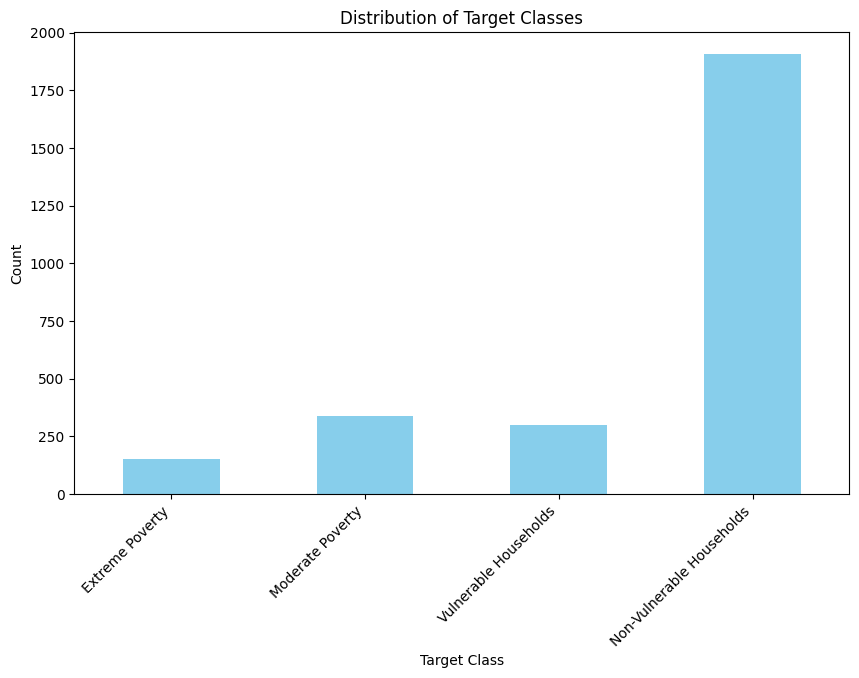

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'target' is the name of your target column
# Count the occurrences of each target value
target_counts = new_poverty['Target'].value_counts().sort_index()

# Map target values to descriptive labels
target_labels = {
    1: 'Extreme Poverty',
    2: 'Moderate Poverty',
    3: 'Vulnerable Households',
    4: 'Non-Vulnerable Households'
}

# Replace target values with descriptive labels
target_counts.index = target_counts.index.map(target_labels)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [530]:
# Im gonna change the data here so that we only have the exact columns we want to explore
# Marital Status
# Education
# Kid Ratio to integer
# Housing Condition
# Electronics
# Region
# new_poverty = poverty_test
new_poverty['housing_condition'] = new_poverty[['wall_condition', 'floor_condition', 'roof_condition']].sum(axis=1)
new_poverty["child_ratio_int"] = (new_poverty["child_ratio"] * 10).astype(int)

new_poverty = new_poverty[["marital_status", "education", "child_ratio_int", "housing_condition", "electronics", "region", "Target"]]
# new_poverty = new_poverty[["marital_status", "education", "child_ratio_int", "housing_condition", "electronics", "region"]]


# new_poverty.to_csv("poverty_train.csv", index=False)
new_poverty.to_csv("poverty_test.csv", index=False)

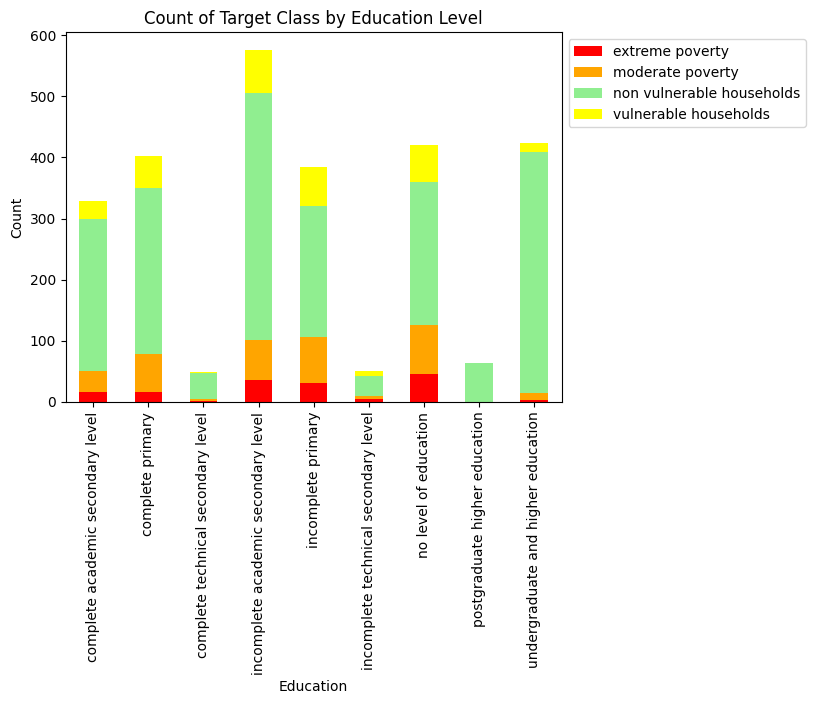

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_poverty_copy = new_poverty.copy()

# Mapping for target and education
target_mapping = {
    1: "extreme poverty",
    2: "moderate poverty",
    3: "vulnerable households",
    4: "non vulnerable households"
}

education_mapping = {
    0: "no level of education",
    1: "incomplete primary",
    2: "complete primary",
    3: "incomplete academic secondary level",
    4: "complete academic secondary level",
    5: "incomplete technical secondary level",
    6: "complete technical secondary level",
    7: "undergraduate and higher education",
    8: "postgraduate higher education"
}

# Replacing numerical values with their corresponding labels
new_poverty_copy['Target'] = new_poverty_copy['Target'].map(target_mapping)
new_poverty_copy['education'] = new_poverty_copy['education'].map(education_mapping)

# Calculating counts
counts = new_poverty_copy.groupby(['education', 'Target']).size()

# Plotting the bar chart
colors = {
    "extreme poverty": "red",
    "moderate poverty": "orange",
    "vulnerable households": "yellow",
    "non vulnerable households": "lightgreen"
}

counts.unstack().plot(kind='bar', stacked=True, color=[colors[col] for col in counts.unstack().columns])

# Adding labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Target Class by Education Level')

# Displaying the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()


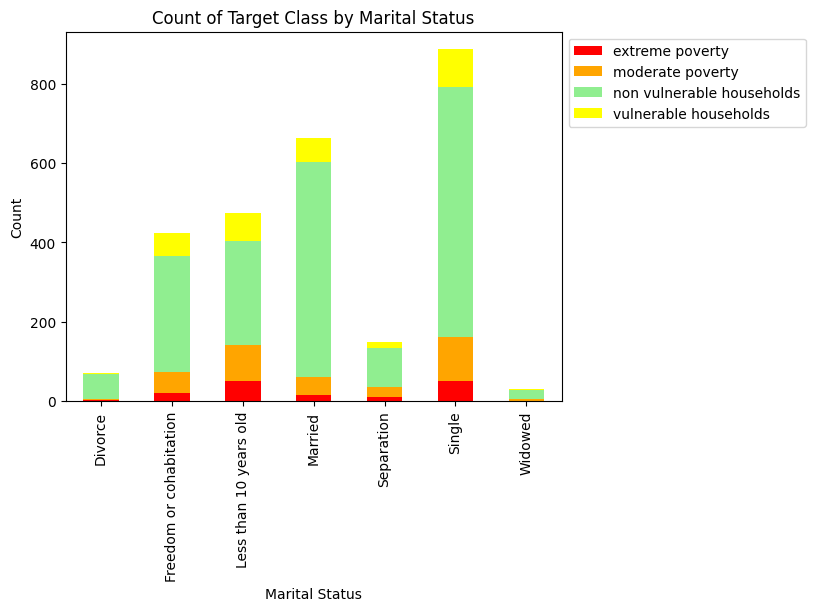

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_poverty_copy = new_poverty.copy()

# Mapping for target and education
target_mapping = {
    1: "extreme poverty",
    2: "moderate poverty",
    3: "vulnerable households",
    4: "non vulnerable households"
}

marital_status_mapping = {
    1: "Less than 10 years old",
    2: "Freedom or cohabitation",
    3: "Married",
    4: "Divorce",
    5: "Separation",
    6: "Widowed",
    7: "Single"
}

# Replacing numerical values with their corresponding labels
new_poverty_copy['Target'] = new_poverty_copy['Target'].map(target_mapping)
new_poverty_copy['marital_status'] = new_poverty_copy['marital_status'].map(marital_status_mapping)

# Calculating counts
counts = new_poverty_copy.groupby(['marital_status', 'Target']).size()

# Plotting the bar chart
colors = {
    "extreme poverty": "red",
    "moderate poverty": "orange",
    "vulnerable households": "yellow",
    "non vulnerable households": "lightgreen"
}

counts.unstack().plot(kind='bar', stacked=True, color=[colors[col] for col in counts.unstack().columns])

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Target Class by Marital Status')

# Displaying the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()

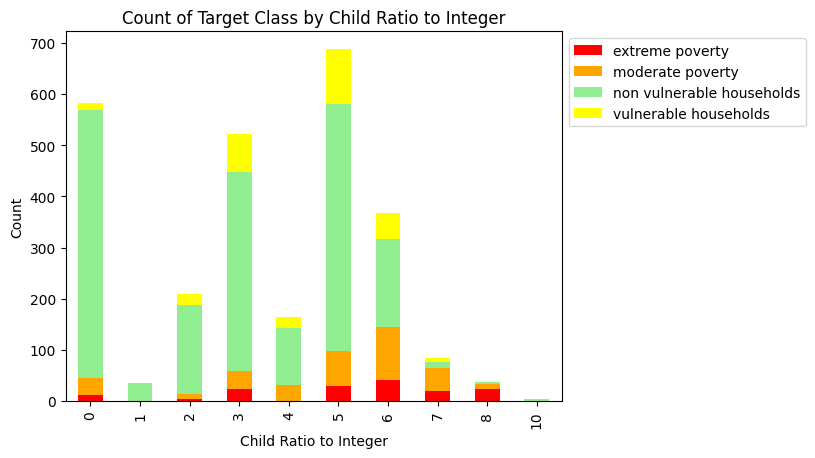

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_poverty_copy = new_poverty.copy()

# Mapping for target and education
target_mapping = {
    1: "extreme poverty",
    2: "moderate poverty",
    3: "vulnerable households",
    4: "non vulnerable households"
}

# Replacing numerical values with their corresponding labels
new_poverty_copy['Target'] = new_poverty_copy['Target'].map(target_mapping)

# Calculating counts
counts = new_poverty_copy.groupby(['child_ratio_int', 'Target']).size()

# Plotting the bar chart
colors = {
    "extreme poverty": "red",
    "moderate poverty": "orange",
    "vulnerable households": "yellow",
    "non vulnerable households": "lightgreen"
}

counts.unstack().plot(kind='bar', stacked=True, color=[colors[col] for col in counts.unstack().columns])

# Adding labels and title
plt.xlabel('Child Ratio to Integer')
plt.ylabel('Count')
plt.title('Count of Target Class by Child Ratio to Integer')

# Displaying the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()

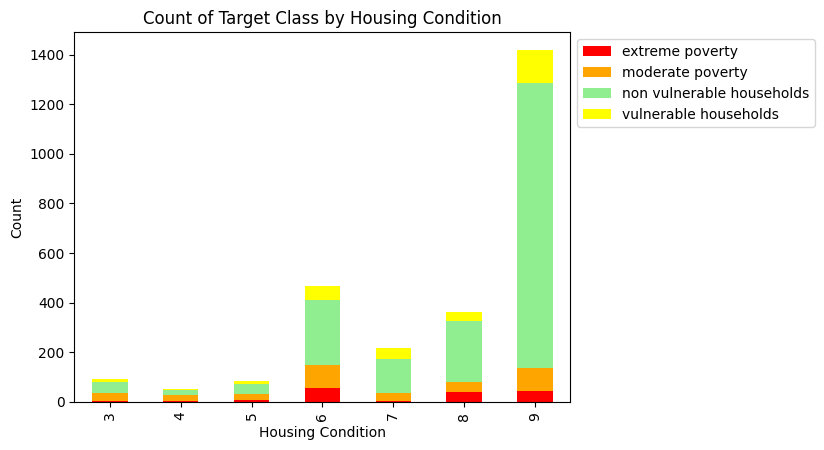

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_poverty_copy = new_poverty.copy()

# Mapping for target and education
target_mapping = {
    1: "extreme poverty",
    2: "moderate poverty",
    3: "vulnerable households",
    4: "non vulnerable households"
}

# Replacing numerical values with their corresponding labels
new_poverty_copy['Target'] = new_poverty_copy['Target'].map(target_mapping)

# Calculating counts
counts = new_poverty_copy.groupby(['housing_condition', 'Target']).size()

# Plotting the bar chart
colors = {
    "extreme poverty": "red",
    "moderate poverty": "orange",
    "vulnerable households": "yellow",
    "non vulnerable households": "lightgreen"
}

counts.unstack().plot(kind='bar', stacked=True, color=[colors[col] for col in counts.unstack().columns])

# Adding labels and title
plt.xlabel('Housing Condition')
plt.ylabel('Count')
plt.title('Count of Target Class by Housing Condition')

# Displaying the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()

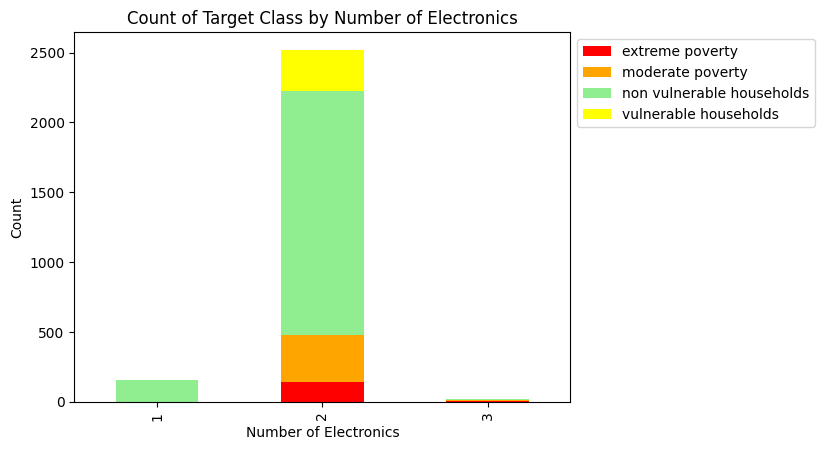

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_poverty_copy = new_poverty.copy()

# Mapping for target and education
target_mapping = {
    1: "extreme poverty",
    2: "moderate poverty",
    3: "vulnerable households",
    4: "non vulnerable households"
}

# Replacing numerical values with their corresponding labels
new_poverty_copy['Target'] = new_poverty_copy['Target'].map(target_mapping)

# Calculating counts
counts = new_poverty_copy.groupby(['electronics', 'Target']).size()

# Plotting the bar chart
colors = {
    "extreme poverty": "red",
    "moderate poverty": "orange",
    "vulnerable households": "yellow",
    "non vulnerable households": "lightgreen"
}

counts.unstack().plot(kind='bar', stacked=True, color=[colors[col] for col in counts.unstack().columns])

# Adding labels and title
plt.xlabel('Number of Electronics')
plt.ylabel('Count')
plt.title('Count of Target Class by Number of Electronics')

# Displaying the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()

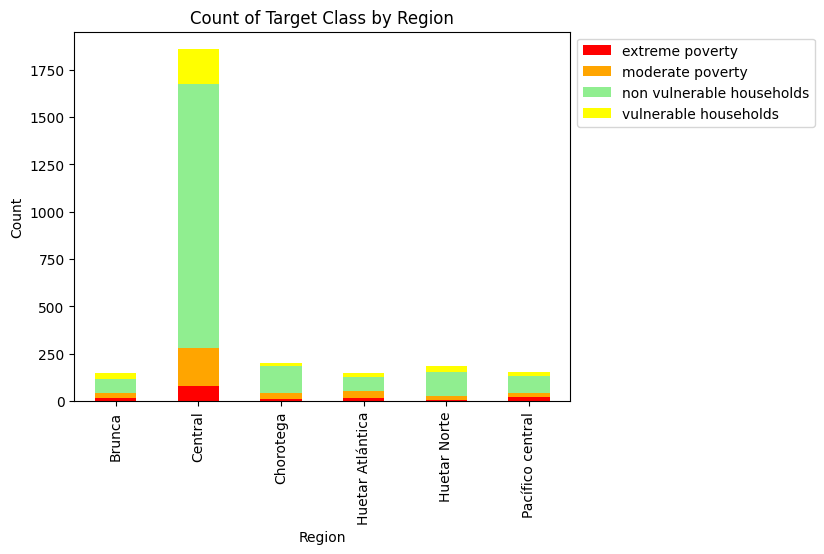

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_poverty_copy = new_poverty.copy()

# Mapping for target and education
target_mapping = {
    1: "extreme poverty",
    2: "moderate poverty",
    3: "vulnerable households",
    4: "non vulnerable households"
}

regional_mapping = {
    1: "Central",
    2: "Chorotega",
    3: "Pacífico central",
    4: "Brunca",
    5: "Huetar Atlántica",
    6: "Huetar Norte"
}

# Replacing numerical values with their corresponding labels
new_poverty_copy['Target'] = new_poverty_copy['Target'].map(target_mapping)
new_poverty_copy['region'] = new_poverty_copy['region'].map(regional_mapping)

# Calculating counts
counts = new_poverty_copy.groupby(['region', 'Target']).size()

# Plotting the bar chart
colors = {
    "extreme poverty": "red",
    "moderate poverty": "orange",
    "vulnerable households": "yellow",
    "non vulnerable households": "lightgreen"
}

counts.unstack().plot(kind='bar', stacked=True, color=[colors[col] for col in counts.unstack().columns])

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Target Class by Region')

# Displaying the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()